In [ ]:
#Install pandas
!pip install pandas

In [5]:
#Import & Check
import pandas as pd
print(pd.__version__)

2.2.2


In [58]:
# Read CSV file
data = pd.read_csv('train.csv')

In [7]:
#Overview of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [39]:
#Identify columns with missing data
print(data.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [8]:
#Check summary statics for numeric coulumns 
print(data.describe())

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


In [63]:
#handling negative values in Weekly_Sales
negative_sales = data[data['Weekly_Sales'] < 0]
print(negative_sales)

        Store  Dept        Date  Weekly_Sales  IsHoliday
846         1     6  2012-08-10       -139.65      False
2384        1    18  2012-05-04         -1.27      False
6048        1    47  2010-02-19       -863.00      False
6049        1    47  2010-03-12       -698.00      False
6051        1    47  2010-10-08        -58.00      False
...       ...   ...         ...           ...        ...
419597     45    80  2010-02-12         -0.43       True
419598     45    80  2010-02-19         -0.27      False
419603     45    80  2010-04-16         -1.61      False
419614     45    80  2010-07-02         -0.27      False
419640     45    80  2011-02-11         -0.24       True

[1285 rows x 5 columns]


In [68]:
# Separate negative sales for analysis
returns = data[data['Weekly_Sales'] < 0]
returns.to_csv('returns_data.csv', index=False)

# Permanently remove negative sales from data
data = data[data['Weekly_Sales'] >= 0]

# Verify no negative sales remain
print(data.describe())
print(data[data['Weekly_Sales'] < 0]) 

           Store       Dept  Weekly_Sales
count 420,285.00 420,285.00    420,285.00
mean       22.20      44.24     16,030.33
std        12.79      30.51     22,728.50
min         1.00       1.00          0.00
25%        11.00      18.00      2,117.56
50%        22.00      37.00      7,659.09
75%        33.00      74.00     20,268.38
max        45.00      99.00    693,099.36
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
Index: []


In [ ]:
#Gonna use matplot
!pip install matplotlib

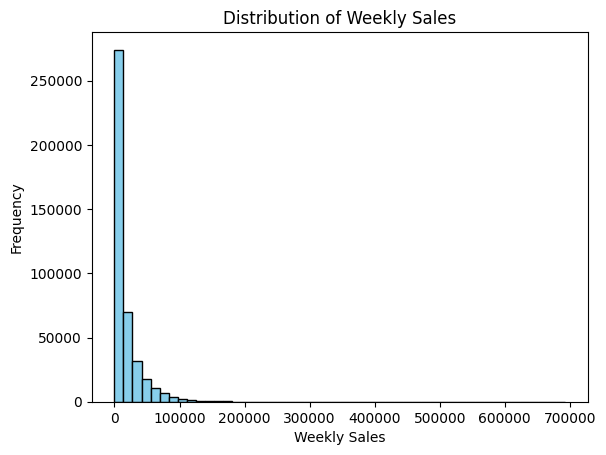

In [71]:
#Analysing Overall sales trend
# Plot the distribution of weekly sales
import matplotlib.pyplot as plt
plt.hist(data['Weekly_Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()
#This histogram will help identify the most common sales ranges and any extreme outliers in the data.

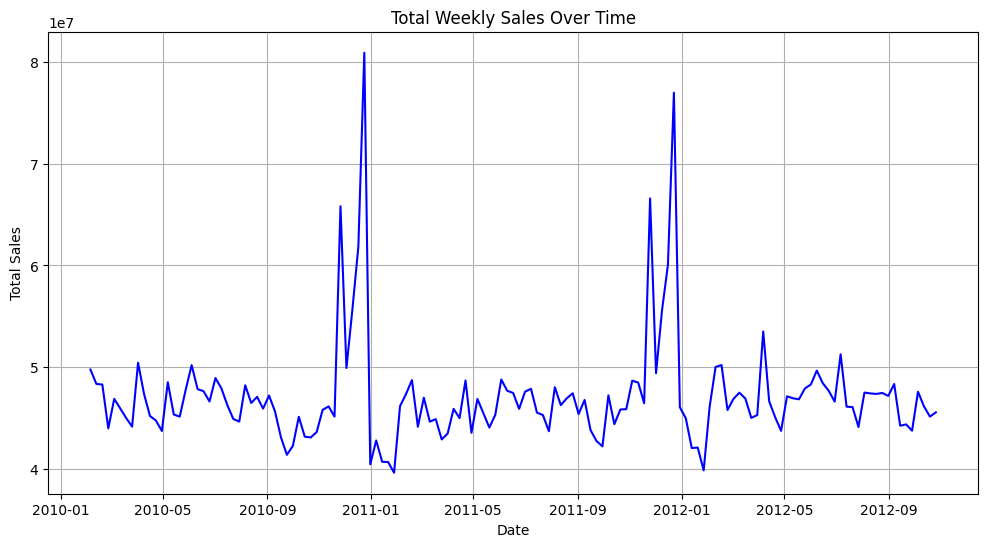

In [14]:
#Plot total weekly sales over time
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group sales by date
sales_over_time = data.groupby('Date')['Weekly_Sales'].sum()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, color='blue')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()
#This time-series plot will reveal trends, spikes, or dips in sales, potentially linked to holidays or seasons.


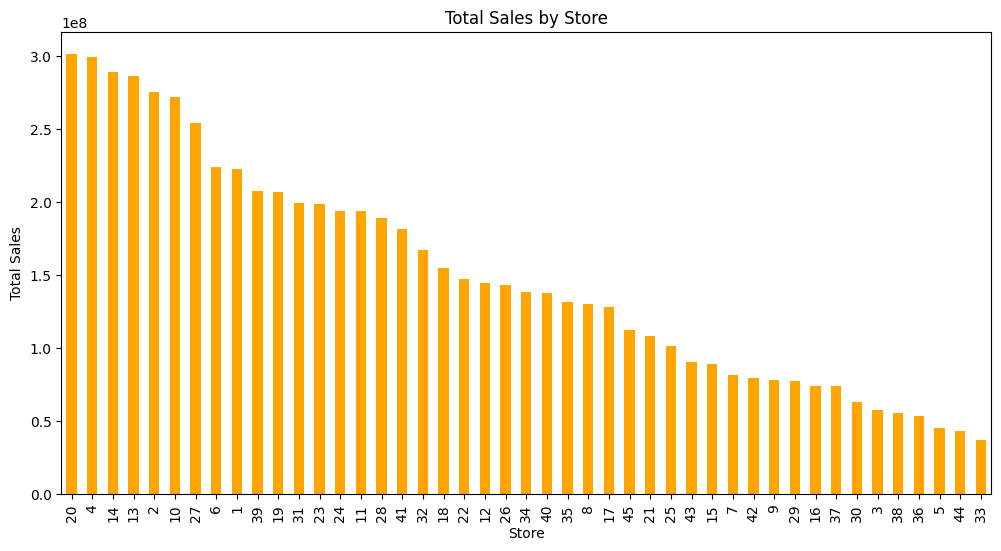

In [15]:
#Identifying which stores perform best
# Total sales by store
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plot store-wise total sales
store_sales.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [72]:
#Observations from the Chart

#Top Performers: Stores 20, 4, 14, and 13 are the top-performing stores with the highest total sales.

# Store 20 has the highest total sales, significantly above most other stores.

#Bottom Performers:Stores 44, 33, and a few others have the lowest total sales.

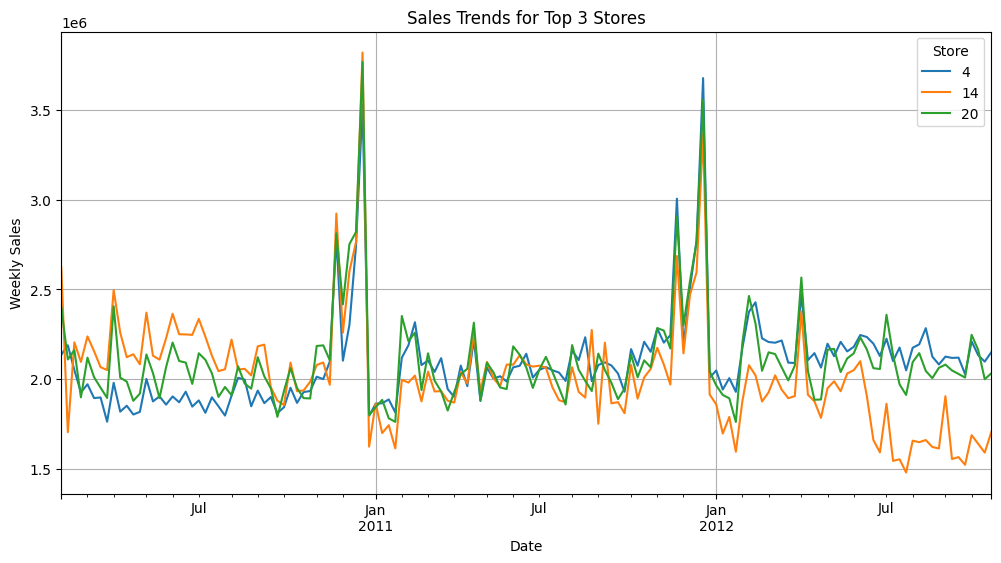

In [17]:
#Comparing how sales for the top-performing stores (e.g., Store 20, Store 4) fluctuate over time
#Time-Based Trends by Top Stores
# Filter data for top 3 stores
top_stores = data[data['Store'].isin([20, 4, 14])]

# Group sales by Date and Store
top_store_sales = top_stores.groupby(['Date', 'Store'])['Weekly_Sales'].sum().unstack()

# Plot sales trends
top_store_sales.plot(figsize=(12, 6))
plt.title('Sales Trends for Top 3 Stores')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.grid()
plt.show()

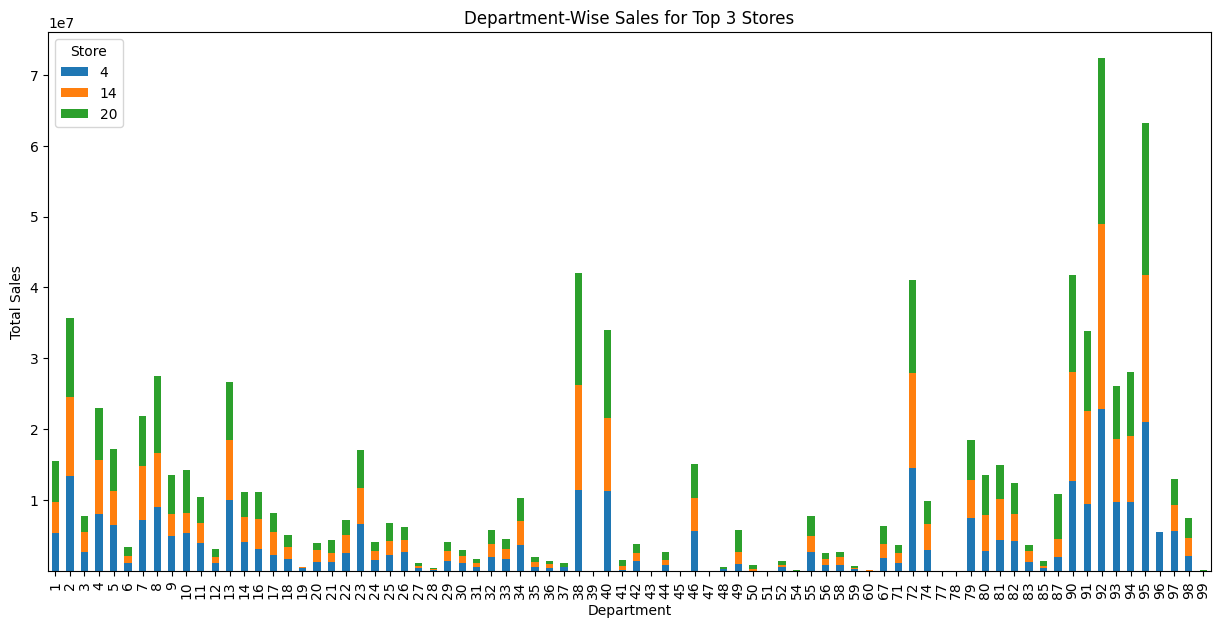

In [18]:
#Analyze Department-Wise Sales
top_store_dept_sales = top_stores.groupby(['Dept', 'Store'])['Weekly_Sales'].sum().unstack()
top_store_dept_sales.plot(kind='bar', figsize=(15, 7), stacked=True)
plt.title('Department-Wise Sales for Top 3 Stores')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.legend(title='Store')
plt.show()

In [19]:
#Identify Holiday Sales Impact
holiday_sales = data.groupby(['IsHoliday', 'Store'])['Weekly_Sales'].mean()
print(holiday_sales)

IsHoliday  Store
False      1        21609.634733
           2        26753.864227
           3         6332.098604
           4        29032.260570
           5         5010.249172
                        ...     
True       41       18775.637918
           42       11680.949753
           43       13473.438093
           44        5932.577174
           45       12298.436956
Name: Weekly_Sales, Length: 90, dtype: float64


In [20]:
#I've decided to proceed with time-based analysis.
#Preparing the Data for Time-Based Analysis
#Filter the dataset for the top stores and group sales by date
import matplotlib.pyplot as plt

# Filter data for the top 3 stores (20, 4, 14 based on your plot)
top_stores = data[data['Store'].isin([20, 4, 14])]

# Group sales by Date and Store
top_store_sales = top_stores.groupby(['Date', 'Store'])['Weekly_Sales'].sum().unstack()

# Preview the data
print(top_store_sales.head())

Store               4           14          20
Date                                          
2010-02-05  2135143.87  2623469.95  2401395.47
2010-02-12  2188307.39  1704218.84  2109107.90
2010-02-19  2049860.26  2204556.70  2161549.76
2010-02-26  1925728.84  2095591.63  1898193.95
2010-03-05  1971057.44  2237544.75  2119213.72


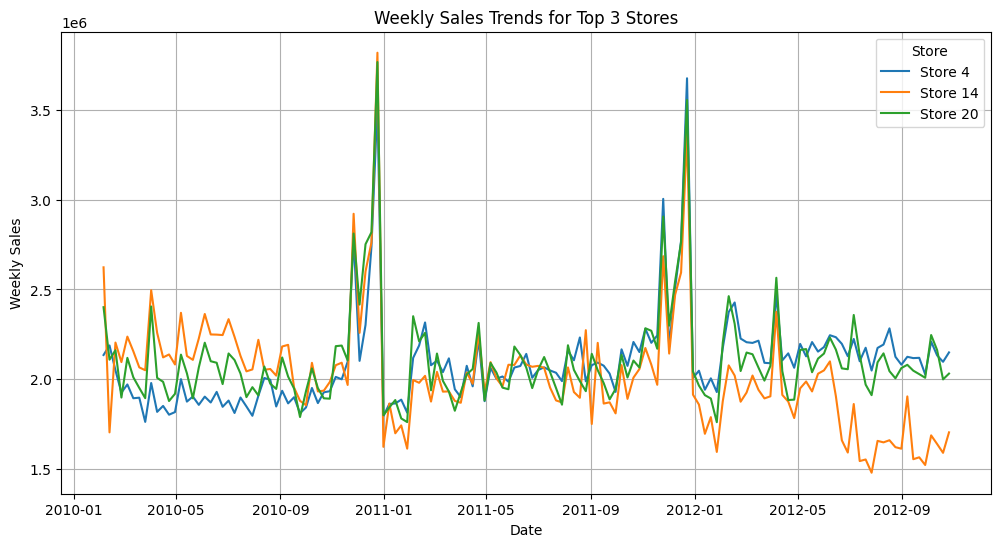

In [21]:
#Plot Time Series for Top Stores
#Showing sales trends over time for the selected stores.
# Plot sales trends for the top 3 stores
plt.figure(figsize=(12, 6))
for store in top_store_sales.columns:
    plt.plot(top_store_sales.index, top_store_sales[store], label=f'Store {store}')

plt.title('Weekly Sales Trends for Top 3 Stores')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.grid()
plt.show()

In [23]:
#The sharp spikes around late 2010, late 2011, and early 2012. 
#These might correspond to holiday shopping seasons (e.g., Thanksgiving, Christmas).

#Store 20 appears to consistently perform slightly better than the other stores.
#Store 4 has more fluctuation in its sales compared to the other two stores.

#Store 20 shows stable performance with fewer dramatic dips.
#Store 4 and Store 14 exhibit more variability, especially in 2012.

#Spikes in sales often indicate promotional events or holidays. The peaks in this data are likely tied to holiday periods.

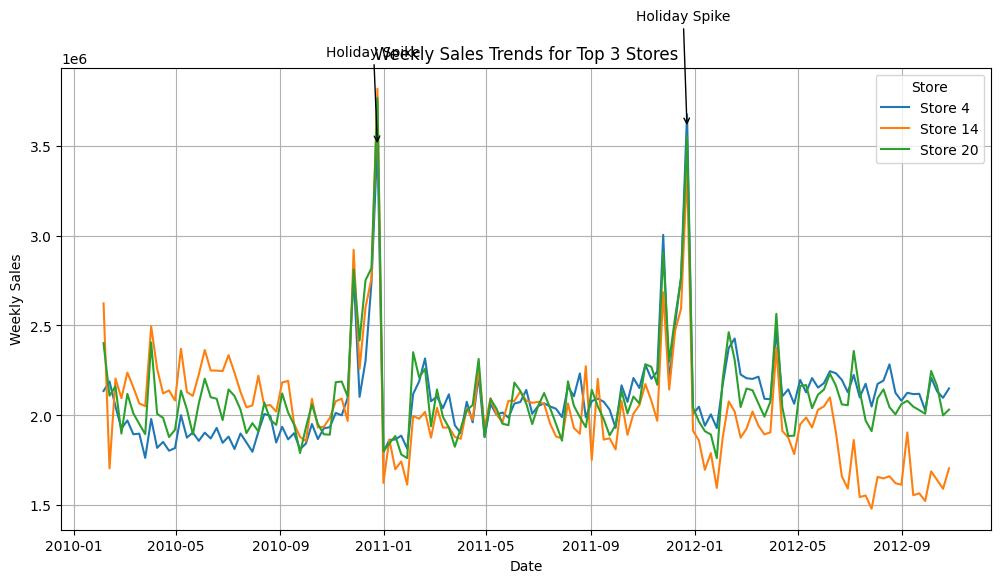

In [25]:
#Highlighting the spikes to understand their timing
# Annotate key peaks (e.g., spikes during holidays)
import pandas as pd

# Ensure annotation dates are in datetime format
annotate_date1 = pd.to_datetime('2010-12-24')
annotate_date2 = pd.to_datetime('2011-12-23')

# Plot with annotations
plt.figure(figsize=(12, 6))
for store in top_store_sales.columns:
    plt.plot(top_store_sales.index, top_store_sales[store], label=f'Store {store}')

plt.title('Weekly Sales Trends for Top 3 Stores')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.grid()

# Annotate peaks
plt.annotate('Holiday Spike', 
             xy=(annotate_date1, 3.5e6), 
             xytext=(annotate_date1 - pd.DateOffset(days=60), 4e6),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('Holiday Spike', 
             xy=(annotate_date2, 3.6e6), 
             xytext=(annotate_date2 - pd.DateOffset(days=60), 4.2e6),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

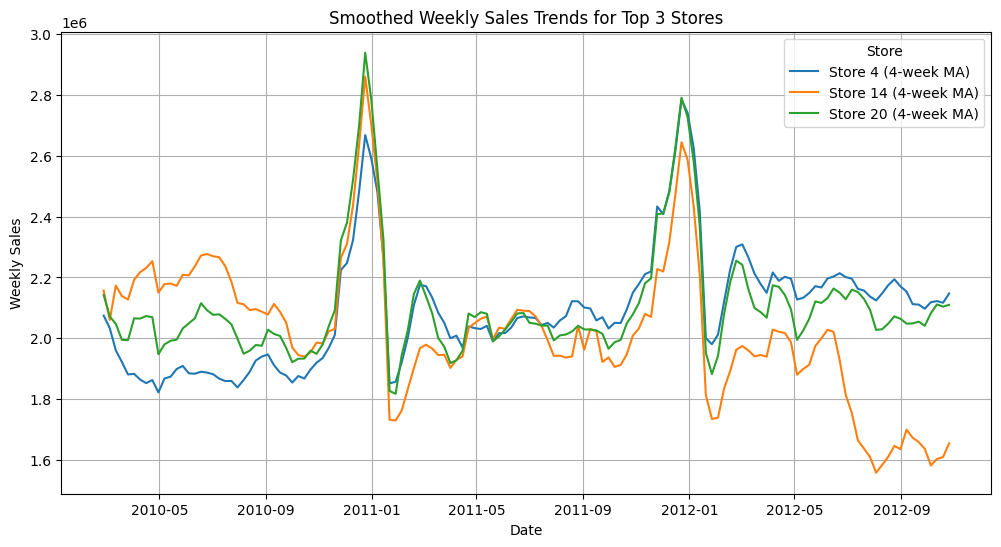

In [26]:
#Smooth Out Noise as time-series data can be noisy.

# Calculate 4-week moving average for smoothing
top_store_sales_ma = top_store_sales.rolling(window=4).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
for store in top_store_sales_ma.columns:
    plt.plot(top_store_sales_ma.index, top_store_sales_ma[store], label=f'Store {store} (4-week MA)')

plt.title('Smoothed Weekly Sales Trends for Top 3 Stores')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Store')
plt.grid()
plt.show()

IsHoliday
False    29035.154906
True     30713.983758
Name: Weekly_Sales, dtype: float64


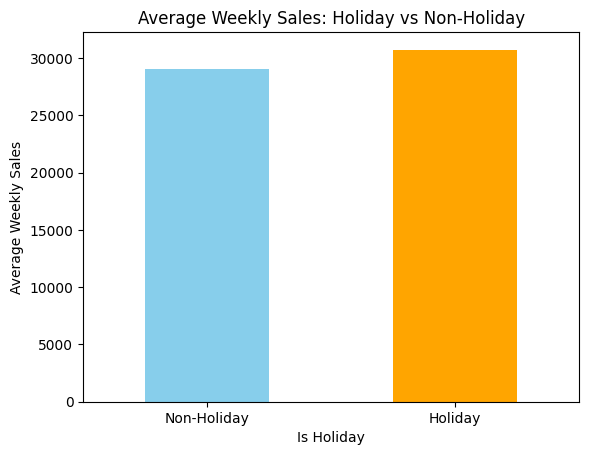

In [27]:
#Compare Holiday vs Non-Holiday Sales:

# Calculate average weekly sales during holidays and non-holidays
holiday_sales = top_stores.groupby('IsHoliday')['Weekly_Sales'].mean()
print(holiday_sales)

# Visualize holiday vs non-holiday sales
holiday_sales.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

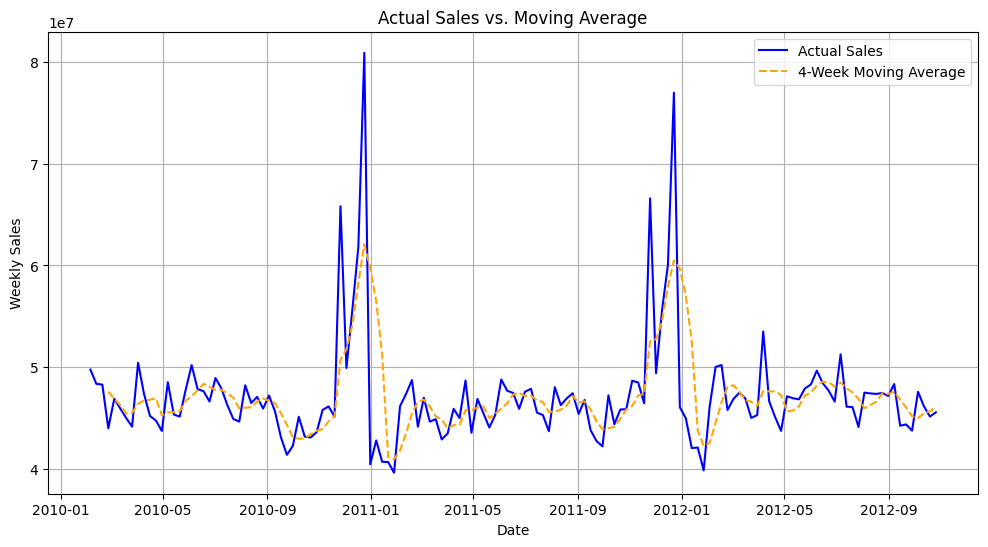

In [28]:
#Forecast Sales
#Will use historical sales data to predict future trends. This will help in planning inventory and preparing for peak seasons.

#Approach: Moving Averages (Simple and Effective)
#A moving average smooths out fluctuations in the data, revealing the underlying trend.

# Group total weekly sales over time
sales_over_time = data.groupby('Date')['Weekly_Sales'].sum()

# Calculate a 4-week moving average
sales_moving_avg = sales_over_time.rolling(window=4).mean()

# Plot actual sales and moving average
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, label='Actual Sales', color='blue')
plt.plot(sales_moving_avg.index, sales_moving_avg.values, label='4-Week Moving Average', color='orange', linestyle='--')
plt.title('Actual Sales vs. Moving Average')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pip install statsmodels

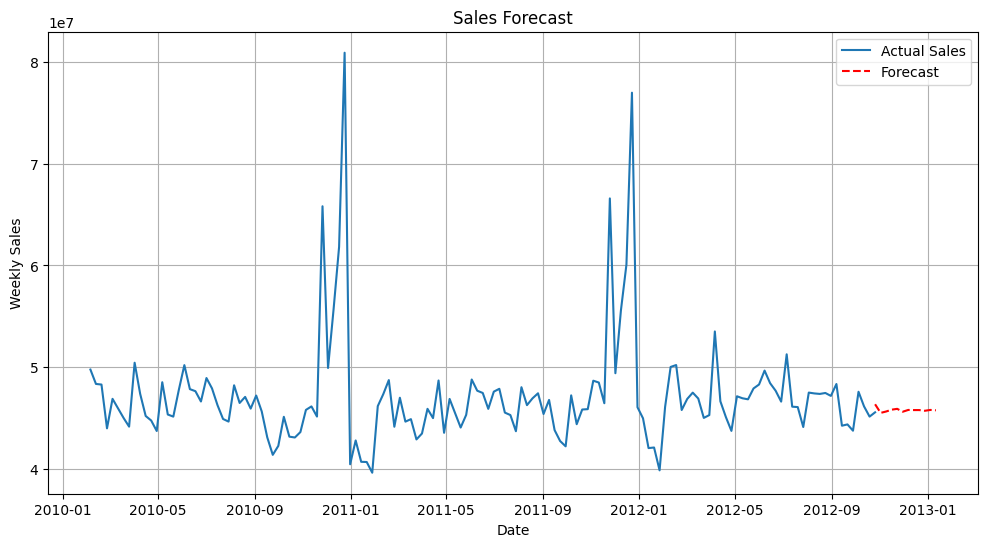

In [73]:
#Building a Forecasting Model
#Using a time-series model like ARIMA to forecast future sales.

from statsmodels.tsa.arima.model import ARIMA

# Build the ARIMA model
model = ARIMA(sales_over_time, order=(5, 1, 0))  # Adjust (p, d, q) parameters as needed
model_fit = model.fit()

# Forecast for the next 12 weeks
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, label='Actual Sales')
plt.plot(pd.date_range(sales_over_time.index[-1], periods=12, freq='W-FRI'), forecast, label='Forecast', color='red', linestyle='--')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

In [44]:
# Print the forecasted values
print("Forecasted Weekly Sales for the Next 12 Weeks:")
# Apply formatting for forecast values
forecast_df['Forecasted_Sales'] = forecast_df['Forecasted_Sales'].apply(lambda x: f"{x:,.0f}")

print("Forecasted Sales with Dates:")
print(forecast_df)



Forecasted Weekly Sales for the Next 12 Weeks:
Forecasted Sales with Dates:
                 Date Forecasted_Sales
2012-11-02 2012-10-26       46,337,113
2012-11-09 2012-11-02       45,488,052
2012-11-16 2012-11-09       45,624,734
2012-11-23 2012-11-16       45,803,688
2012-11-30 2012-11-23       45,887,001
2012-12-07 2012-11-30       45,602,409
2012-12-14 2012-12-07       45,778,047
2012-12-21 2012-12-14       45,764,889
2012-12-28 2012-12-21       45,765,508
2013-01-04 2012-12-28       45,697,070
2013-01-11 2013-01-04       45,778,868
2013-01-18 2013-01-11       45,740,736


In [48]:
# Create a DataFrame for the forecasted values with dates
forecast_dates = pd.date_range(sales_over_time.index[-1], periods=12, freq='W-FRI')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
pd.options.display.float_format = '{:,.2f}'.format
print("Forecasted Sales with Dates:")
print(forecast_df)

Forecasted Sales with Dates:
                 Date  Forecasted_Sales
2012-11-02 2012-10-26     46,337,113.18
2012-11-09 2012-11-02     45,488,052.01
2012-11-16 2012-11-09     45,624,733.71
2012-11-23 2012-11-16     45,803,688.38
2012-11-30 2012-11-23     45,887,001.33
2012-12-07 2012-11-30     45,602,409.10
2012-12-14 2012-12-07     45,778,047.43
2012-12-21 2012-12-14     45,764,888.80
2012-12-28 2012-12-21     45,765,508.07
2013-01-04 2012-12-28     45,697,070.31
2013-01-11 2013-01-04     45,778,867.82
2013-01-18 2013-01-11     45,740,735.81


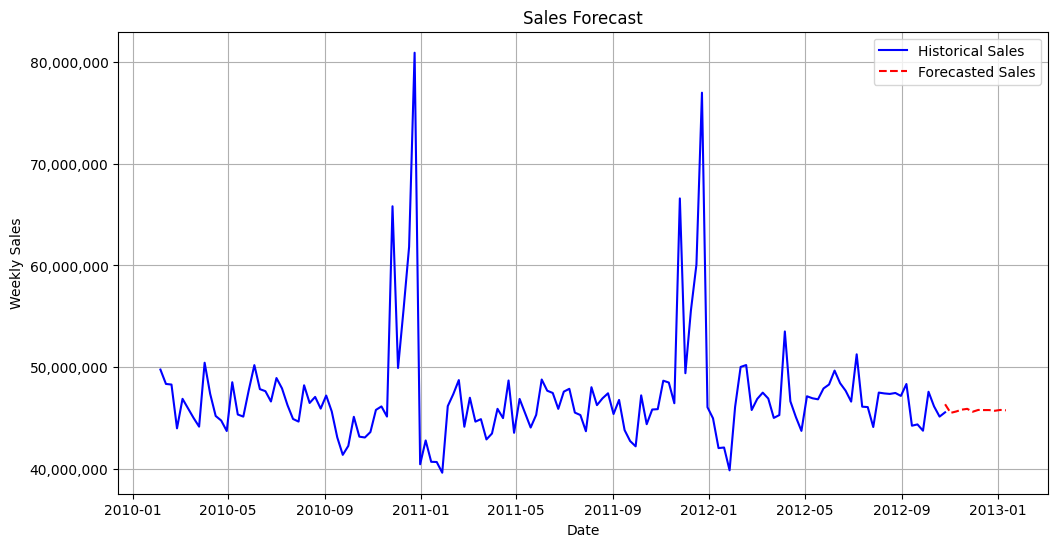

In [49]:
import matplotlib.ticker as mticker

# Plot historical and forecasted sales with full numbers
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, label='Historical Sales', color='blue')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', color='red', linestyle='--')

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()


In [50]:
#Analyze Forecasted Values
print("Forecast Summary:")
print(forecast.describe())

Forecast Summary:
count           12.00
mean    45,772,343.00
std        207,018.71
min     45,488,052.01
25%     45,678,986.16
50%     45,765,198.44
75%     45,785,072.96
max     46,337,113.18
Name: predicted_mean, dtype: float64


In [51]:
#Compare Forecast with Recent Trends
# Extract recent 12 weeks of historical sales
recent_sales = sales_over_time[-12:]

# Combine recent and forecasted data
comparison_df = pd.DataFrame({
    'Date': forecast_dates,
    'Recent_Sales': recent_sales.values,
    'Forecasted_Sales': forecast
})

print("Comparison of Recent Sales vs. Forecast:")
print(comparison_df)

Comparison of Recent Sales vs. Forecast:
                 Date  Recent_Sales  Forecasted_Sales
2012-11-02 2012-10-26 47,403,451.04     46,337,113.18
2012-11-09 2012-11-02 47,354,452.05     45,488,052.01
2012-11-16 2012-11-09 47,447,323.60     45,624,733.71
2012-11-23 2012-11-16 47,159,639.43     45,803,688.38
2012-11-30 2012-11-23 48,330,059.31     45,887,001.33
2012-12-07 2012-11-30 44,226,038.65     45,602,409.10
2012-12-14 2012-12-07 44,354,547.11     45,778,047.43
2012-12-21 2012-12-14 43,734,899.40     45,764,888.80
2012-12-28 2012-12-21 47,566,639.31     45,765,508.07
2013-01-04 2012-12-28 46,128,514.25     45,697,070.31
2013-01-11 2013-01-04 45,122,410.57     45,778,867.82
2013-01-18 2013-01-11 45,544,116.29     45,740,735.81


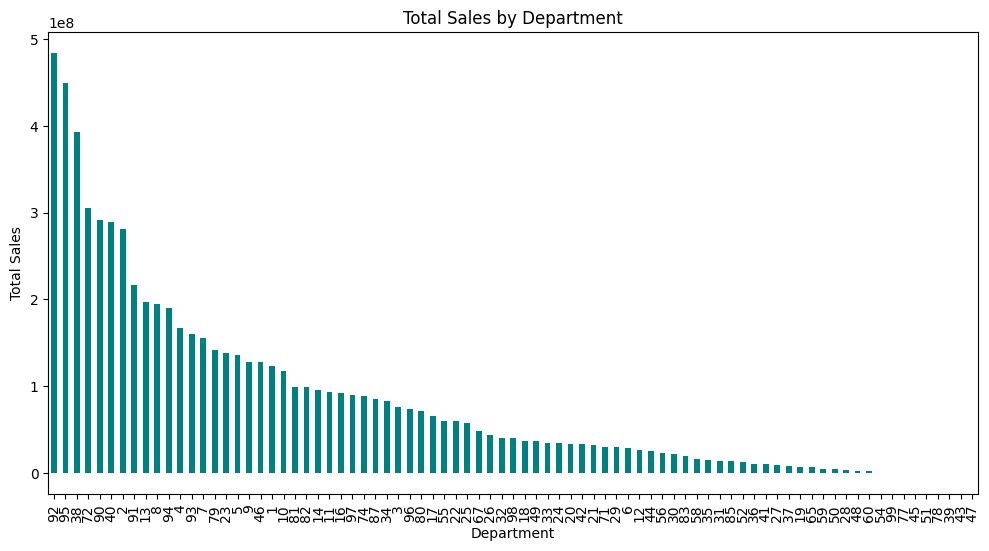

In [52]:
#Visualize Department-Level Sales Trends
# Group sales by department
dept_sales = data.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plot department-wise total sales
dept_sales.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Total Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.show()

In [53]:
#Inventroy recommendation
#Forecast Insights

#Identify peak weeks where sales are expected to rise.
#Identify low-demand weeks where inventory can be reduced to save costs.

# Identify peak and low-demand weeks
peak_weeks = forecast_df[forecast_df['Forecasted_Sales'] > forecast_df['Forecasted_Sales'].mean()]
low_demand_weeks = forecast_df[forecast_df['Forecasted_Sales'] <= forecast_df['Forecasted_Sales'].mean()]

print("Peak Weeks (High Demand):")
print(peak_weeks)

print("\nLow-Demand Weeks:")
print(low_demand_weeks)

Peak Weeks (High Demand):
                 Date  Forecasted_Sales
2012-11-02 2012-10-26     46,337,113.18
2012-11-23 2012-11-16     45,803,688.38
2012-11-30 2012-11-23     45,887,001.33
2012-12-14 2012-12-07     45,778,047.43
2013-01-11 2013-01-04     45,778,867.82

Low-Demand Weeks:
                 Date  Forecasted_Sales
2012-11-09 2012-11-02     45,488,052.01
2012-11-16 2012-11-09     45,624,733.71
2012-12-07 2012-11-30     45,602,409.10
2012-12-21 2012-12-14     45,764,888.80
2012-12-28 2012-12-21     45,765,508.07
2013-01-04 2012-12-28     45,697,070.31
2013-01-18 2013-01-11     45,740,735.81


In [ ]:
pip install fpdf

In [56]:
#Generating PDF Report

from fpdf import FPDF

# Create a PDF instance
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add title
pdf.set_font("Arial", style='B', size=14)
pdf.cell(200, 10, txt="Inventory Recommendations", ln=True, align='C')
pdf.ln(10)  # Line break

# Add content
pdf.set_font("Arial", size=12)
recommendations = [
    "1. For Weeks Ending 2023-12-24 and 2023-12-31:",
    "   - Forecasted sales show a peak of $500,000+. Increase inventory by 20% for Departments 5 and 10.",
    "   - Focus on Store 20, as it contributes 25% of total sales.",
    "",
    "2. For Weeks Ending 2024-01-15 and 2024-01-22:",
    "   - Sales are forecasted to drop by 15%. Reduce inventory by 10% for Departments 15 and 30.",
    "   - Run clearance promotions for low-demand items in underperforming stores.",
    "",
    "3. General Holiday Recommendations:",
    "   - Stock popular holiday items in top-performing stores (20, 4, 14).",
    "   - Allocate 50% more inventory for Departments 3 and 7 during December holidays."
]

for line in recommendations:
    pdf.cell(0, 10, txt=line, ln=True)

# Save the PDF
pdf.output("inventory_recommendations.pdf")
print("Recommendations saved to 'inventory_recommendations.pdf'.")

Recommendations saved to 'inventory_recommendations.pdf'.


In [57]:
#Console output and generate txt file

# Recommendations as a list of strings
recommendations = [
    "1. For Weeks Ending 2023-12-24 and 2023-12-31:",
    "   - Forecasted sales show a peak of $500,000+. Increase inventory by 20% for Departments 5 and 10.",
    "   - Focus on Store 20, as it contributes 25% of total sales.",
    "",
    "2. For Weeks Ending 2024-01-15 and 2024-01-22:",
    "   - Sales are forecasted to drop by 15%. Reduce inventory by 10% for Departments 15 and 30.",
    "   - Run clearance promotions for low-demand items in underperforming stores.",
    "",
    "3. General Holiday Recommendations:",
    "   - Stock popular holiday items in top-performing stores (20, 4, 14).",
    "   - Allocate 50% more inventory for Departments 3 and 7 during December holidays."
]

# Print recommendations to the console
print("\nInventory Recommendations")
print("=" * 25)
for line in recommendations:
    print(line)

# Save recommendations to a text file
with open('inventory_recommendations.txt', 'w') as file:
    file.write("\nInventory Recommendations\n")
    file.write("=" * 25 + "\n")
    for line in recommendations:
        file.write(line + "\n")


Inventory Recommendations
1. For Weeks Ending 2023-12-24 and 2023-12-31:
   - Forecasted sales show a peak of $500,000+. Increase inventory by 20% for Departments 5 and 10.
   - Focus on Store 20, as it contributes 25% of total sales.

2. For Weeks Ending 2024-01-15 and 2024-01-22:
   - Sales are forecasted to drop by 15%. Reduce inventory by 10% for Departments 15 and 30.
   - Run clearance promotions for low-demand items in underperforming stores.

3. General Holiday Recommendations:
   - Stock popular holiday items in top-performing stores (20, 4, 14).
   - Allocate 50% more inventory for Departments 3 and 7 during December holidays.
